In [1]:
import sys,importlib
sys.path.append('../')
import simulation
from numpy import *
from sympy import *
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline
init_printing()

In [2]:
Variables=symbols("x1 y1 x2 y2")
x1,y1,x2,y2 = Variables
Time=symbols("t")
t=Time
Parameters = symbols("alpha beta gamma delta w a0 a1 omega")
alpha,beta,gamma,delta,w,a0,a1,omega = Parameters

### Duffing system

In [27]:
F=Matrix([y1, gamma*cos(omega*t) - delta*y1 - beta*x1 - alpha*x1**3,
          y2, gamma*cos(omega*t) - delta*y2 - beta*x2 - alpha*x2**3])
F

⎡                y₁                ⎤
⎢                                  ⎥
⎢      3                           ⎥
⎢- α⋅x₁  - β⋅x₁ - δ⋅y₁ + γ⋅cos(ω⋅t)⎥
⎢                                  ⎥
⎢                y₂                ⎥
⎢                                  ⎥
⎢      3                           ⎥
⎣- α⋅x₂  - β⋅x₂ - δ⋅y₂ + γ⋅cos(ω⋅t)⎦

In [28]:
zeta=Matrix([0,0,
             0,0])
#zeta=eps*zeta
zeta

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

### Synchrony

In [29]:
phi=Matrix([(x2-x1-(a0+a1*sin(w*t))),y2-y1-(a0+a1*sin(w*t))])
phi

⎡-a₀ - a₁⋅sin(t⋅w) - x₁ + x₂⎤
⎢                           ⎥
⎣-a₀ - a₁⋅sin(t⋅w) - y₁ + y₂⎦

In [30]:
N=simulation.VectorDivergence(phi,Variables)
N

⎡-1  0   1  0⎤
⎢            ⎥
⎣0   -1  0  1⎦

In [31]:
on_manifold = [(x2,x1+(a0+a1*sin(w*t))),(y2,y1+(a0+a1*sin(w*t)))]

## Invariance

In [32]:
# NF=(N*(F+zeta)).subs([(x2,x1*(a0+a1*sin(w*t))),(y2,y1*(a0+a1*sin(w*t))),(z2,z1*(a0+a1*sin(w*t)))])
# simplify(NF)
NF=N*(F+zeta)
NF
#simplify(NF)

⎡                -y₁ + y₂                 ⎤
⎢                                         ⎥
⎢    3       3                            ⎥
⎣α⋅x₁  - α⋅x₂  + β⋅x₁ - β⋅x₂ + δ⋅y₁ - δ⋅y₂⎦

In [33]:
dPhi=diff(phi,Time)
dPhi

⎡-a₁⋅w⋅cos(t⋅w)⎤
⎢              ⎥
⎣-a₁⋅w⋅cos(t⋅w)⎦

In [34]:
eqn=(NF+dPhi)#.subs([(x2,x1*(a0+a1*sin(w*t))),(y2,y1*(a0+a1*sin(w*t))),(z2,z1*(a0+a1*sin(w*t)))])
simplify(eqn)

⎡                 -a₁⋅w⋅cos(t⋅w) - y₁ + y₂                 ⎤
⎢                                                          ⎥
⎢                     3       3                            ⎥
⎣-a₁⋅w⋅cos(t⋅w) + α⋅x₁  - α⋅x₂  + β⋅x₁ - β⋅x₂ + δ⋅y₁ - δ⋅y₂⎦

In [35]:
# This is working only because of the nature of the N matrix - be careful
zeta[2]=-(eqn)[0]
zeta[3]=-(eqn)[1]

simplify(zeta)

⎡                            0                            ⎤
⎢                                                         ⎥
⎢                            0                            ⎥
⎢                                                         ⎥
⎢                 a₁⋅w⋅cos(t⋅w) + y₁ - y₂                 ⎥
⎢                                                         ⎥
⎢                    3       3                            ⎥
⎣a₁⋅w⋅cos(t⋅w) - α⋅x₁  + α⋅x₂  - β⋅x₁ + β⋅x₂ - δ⋅y₁ + δ⋅y₂⎦

In [36]:
zeta=zeta.subs(on_manifold)
zeta

⎡                                                           0                 
⎢                                                                             
⎢                                                           0                 
⎢                                                                             
⎢                                           -a₀ + a₁⋅w⋅cos(t⋅w) - a₁⋅sin(t⋅w) 
⎢                                                                             
⎢                    3                            3                           
⎣a₁⋅w⋅cos(t⋅w) - α⋅x₁  + α⋅(a₀ + a₁⋅sin(t⋅w) + x₁)  - β⋅x₁ + β⋅(a₀ + a₁⋅sin(t⋅

                                           ⎤
                                           ⎥
                                           ⎥
                                           ⎥
                                           ⎥
                                           ⎥
                                           ⎥
w) + x₁) - δ⋅y₁ + δ⋅(a₀ + a₁⋅sin(t⋅w) + y₁)⎦

In [37]:
NF=N*(F+zeta)#.subs([(x2,x1*(a0+a1*sin(w*t))),(y2,y1*(a0+a1*sin(w*t))),(z2,z1*(a0+a1*sin(w*t)))])
simplify(NF)
simplify(NF+dPhi).subs(on_manifold)

⎡0⎤
⎢ ⎥
⎣0⎦

In [38]:
NZ=N*zeta
NZ

⎡                                           -a₀ + a₁⋅w⋅cos(t⋅w) - a₁⋅sin(t⋅w) 
⎢                                                                             
⎢                    3                            3                           
⎣a₁⋅w⋅cos(t⋅w) - α⋅x₁  + α⋅(a₀ + a₁⋅sin(t⋅w) + x₁)  - β⋅x₁ + β⋅(a₀ + a₁⋅sin(t⋅

                                           ⎤
                                           ⎥
                                           ⎥
w) + x₁) - δ⋅y₁ + δ⋅(a₀ + a₁⋅sin(t⋅w) + y₁)⎦

## Stability

In [51]:
chi=Matrix([0,0,
           -(x2-x1-(a0+a1*sin(w*t))),-(y2-y1-(a0+a1*sin(w*t)))])

#chi=(epsilon1*sin(b*t)+epsilon2)*chi 
#chi=epsilon*chi
#epsilon=1
chi

⎡            0             ⎤
⎢                          ⎥
⎢            0             ⎥
⎢                          ⎥
⎢a₀ + a₁⋅sin(t⋅w) + x₁ - x₂⎥
⎢                          ⎥
⎣a₀ + a₁⋅sin(t⋅w) + y₁ - y₂⎦

In [40]:
del_zeta=simulation.VectorDivergence(zeta,Variables)
del_zeta

⎡                   0                      0  0  0⎤
⎢                                                 ⎥
⎢                   0                      0  0  0⎥
⎢                                                 ⎥
⎢                   0                      0  0  0⎥
⎢                                                 ⎥
⎢        2                              2         ⎥
⎣- 3⋅α⋅x₁  + 3⋅α⋅(a₀ + a₁⋅sin(t⋅w) + x₁)   0  0  0⎦

In [41]:
del_chi=simulation.VectorDivergence(chi,Variables)
del_chi

⎡0  0  0   0 ⎤
⎢            ⎥
⎢0  0  0   0 ⎥
⎢            ⎥
⎢1  0  -1  0 ⎥
⎢            ⎥
⎣0  1  0   -1⎦

In [42]:
del_F=simulation.VectorDivergence(F,Variables)
del_F

⎡      0        1         0        0 ⎤
⎢                                    ⎥
⎢        2                           ⎥
⎢- 3⋅α⋅x₁  - β  -δ        0        0 ⎥
⎢                                    ⎥
⎢      0        0         0        1 ⎥
⎢                                    ⎥
⎢                           2        ⎥
⎣      0        0   - 3⋅α⋅x₂  - β  -δ⎦

In [43]:
(del_F+del_zeta+del_chi)

⎡                   0                      1         0          0   ⎤
⎢                                                                   ⎥
⎢                     2                                             ⎥
⎢             - 3⋅α⋅x₁  - β                -δ        0          0   ⎥
⎢                                                                   ⎥
⎢                   1                      0        -1          1   ⎥
⎢                                                                   ⎥
⎢        2                              2              2            ⎥
⎣- 3⋅α⋅x₁  + 3⋅α⋅(a₀ + a₁⋅sin(t⋅w) + x₁)   1   - 3⋅α⋅x₂  - β  -δ - 1⎦

In [44]:
diff(N,t)*N.transpose()

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [45]:
Jac = N*(del_F+del_zeta+del_chi)*N.transpose() + diff(N,t)*N.transpose()
Jac = simplify(Jac)
Jac.subs(on_manifold)

⎡                 -2                      2    ⎤
⎢                                              ⎥
⎢                             2                ⎥
⎣- 6⋅α⋅(a₀ + a₁⋅sin(t⋅w) + x₁)  - 2⋅β  -2⋅δ - 2⎦

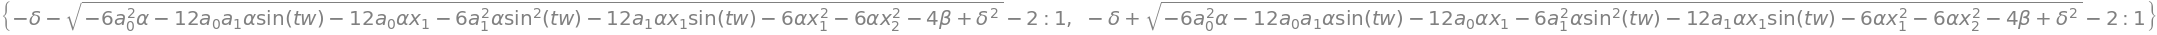

In [46]:
Jac.eigenvals()

### coupling

In [47]:
chi

⎡            0             ⎤
⎢                          ⎥
⎢            0             ⎥
⎢                          ⎥
⎢a₀ + a₁⋅sin(t⋅w) + x₁ - x₂⎥
⎢                          ⎥
⎣a₀ + a₁⋅sin(t⋅w) + y₁ - y₂⎦

In [48]:
zeta

⎡                                                           0                 
⎢                                                                             
⎢                                                           0                 
⎢                                                                             
⎢                                           -a₀ + a₁⋅w⋅cos(t⋅w) - a₁⋅sin(t⋅w) 
⎢                                                                             
⎢                    3                            3                           
⎣a₁⋅w⋅cos(t⋅w) - α⋅x₁  + α⋅(a₀ + a₁⋅sin(t⋅w) + x₁)  - β⋅x₁ + β⋅(a₀ + a₁⋅sin(t⋅

                                           ⎤
                                           ⎥
                                           ⎥
                                           ⎥
                                           ⎥
                                           ⎥
                                           ⎥
w) + x₁) - δ⋅y₁ + δ⋅(a₀ + a₁⋅sin(t⋅w) + y₁)⎦

In [49]:
simplify((chi+zeta))

⎡                                                              0              
⎢                                                                             
⎢                                                              0              
⎢                                                                             
⎢                                                   a₁⋅w⋅cos(t⋅w) + x₁ - x₂   
⎢                                                                             
⎢                                                                             
⎣a₀⋅β + a₀⋅δ + a₀ + a₁⋅β⋅sin(t⋅w) + a₁⋅δ⋅sin(t⋅w) + a₁⋅w⋅cos(t⋅w) + a₁⋅sin(t⋅w

                                                ⎤
                                                ⎥
                                                ⎥
                                                ⎥
                                                ⎥
                                                ⎥
        3                            3          ⎥
) - α⋅x₁  + α⋅(a₀

In [26]:
simplify((chi+zeta))#.subs(on_manifold))

⎡                                                                         0   
⎢                                                                             
⎢                                                                         0   
⎢                                                                             
⎢                                      a₀ + a₁⋅w⋅cos(t⋅w) + a₁⋅sin(t⋅w) + x₁ -
⎢                                                                             
⎢                                       3                            3        
⎣a₀ + a₁⋅w⋅cos(t⋅w) + a₁⋅sin(t⋅w) - α⋅x₁  + α⋅(a₀ + a₁⋅sin(t⋅w) + x₁)  - β⋅x₁ 

                                                                      ⎤
                                                                      ⎥
                                                                      ⎥
                                                                      ⎥
 x₂ - y₁⋅(a₀ + a₁⋅sin(t⋅w)) + y₁                                      ⎥
       